In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


In [10]:
df = pd.read_csv('../data/processed/match_features_engineered.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nColumns ({len(df.columns)}):")
print(df.columns.tolist())

Dataset shape: (1095, 50)

Columns (50):
['match_id', 'season', 'date', 'venue', 'city', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'team1_form', 'team2_form', 'h2h_matches', 'team1_h2h_win_rate', 'team1_venue_win_rate', 'team2_venue_win_rate', 'team1_venue_matches', 'team2_venue_matches', 'team1_toss_impact', 'team2_toss_impact', 'team1_season_win_rate', 'team2_season_win_rate', 'team1_season_matches', 'team2_season_matches', 'is_day_match', 'is_playoff', 'season_phase', 'innings1_death_runs', 'innings2_death_runs', 'innings1_death_wickets', 'innings2_death_wickets', 'innings1_middle_runs', 'innings2_middle_runs', 'innings1_middle_wickets', 'innings2_middle_wickets', 'innings1_powerplay_runs', 'innings2_powerplay_runs', 'innings1_powerplay_wickets', 'innings2_powerplay_wickets', 'innings1_total_runs', 'innings2_total_runs', 'innings1_total_wickets', 'innings2_total_wickets', 'form_difference', 'venue_advantage', 'season_momentum_diff', 'toss_advantage', 'team1_home', 

In [11]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

df.head()

,match_id,season,date,venue,city,team1,team2,toss_winner,toss_decision,winner,team1_form,team2_form,h2h_matches,team1_h2h_win_rate,team1_venue_win_rate,team2_venue_win_rate,team1_venue_matches,team2_venue_matches,team1_toss_impact,team2_toss_impact,team1_season_win_rate,team2_season_win_rate,team1_season_matches,team2_season_matches,is_day_match,is_playoff,season_phase,innings1_death_runs,innings2_death_runs,innings1_death_wickets,innings2_death_wickets,innings1_middle_runs,innings2_middle_runs,innings1_middle_wickets,innings2_middle_wickets,innings1_powerplay_runs,innings2_powerplay_runs,innings1_powerplay_wickets,innings2_powerplay_wickets,innings1_total_runs,innings2_total_runs,innings1_total_wickets,innings2_total_wickets,form_difference,venue_advantage,season_momentum_diff,toss_advantage,team1_home,team2_home,target
0,335982,2007,2008-04-18,"M Chinnaswamy Stadium, Bengaluru",Bangalore,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,0.5,0.5,0,0.5,0.5,0.5,0,0,0.5,0.5,0.285714,0.461538,14,13,1,0,early,64.0,0.0,1.0,0.0,90.0,49.0,1.0,6.0,68.0,33.0,1.0,4.0,222.0,82.0,3.0,10.0,0.0,0.0,-0.175824,0.5,0,0,0
1,335983,2007,2008-04-19,"Punjab Cricket Association IS Bindra Stadium, ...",Chandigarh,Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,0.5,0.5,0,0.5,0.5,0.5,0,0,0.5,0.5,0.666667,0.562500,15,16,1,0,early,71.0,31.0,0.0,1.0,107.0,107.0,3.0,2.0,62.0,69.0,2.0,1.0,240.0,207.0,5.0,4.0,0.0,0.0,0.104167,0.5,0,0,0
2,335984,2007,2008-04-19,"Arun Jaitley Stadium, Delhi",Delhi,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,0.5,0.5,0,0.5,0.5,0.5,0,0,0.5,0.5,0.500000,0.812500,14,16,1,0,early,23.0,0.0,1.0,0.0,62.0,73.0,4.0,0.0,44.0,59.0,3.0,1.0,129.0,132.0,8.0,1.0,0.0,0.0,-0.312500,0.5,1,0,1
3,335985,2007,2008-04-20,"Wankhede Stadium, Mumbai",Mumbai,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,Royal Challengers Bengaluru,0.5,0.0,0,0.5,0.5,0.5,0,0,0.5,0.0,0.500000,0.285714,14,14,1,0,early,47.0,40.0,3.0,1.0,64.0,80.0,1.0,3.0,54.0,46.0,3.0,1.0,165.0,166.0,7.0,5.0,0.5,0.0,0.214286,0.5,1,0,0
4,335986,2007,2008-04-20,"Eden Gardens, Kolkata",Kolkata,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,1.0,0.5,0,0.5,0.5,0.5,0,0,0.5,0.5,0.461538,0.142857,13,14,1,0,early,28.0,25.0,4.0,1.0,37.0,54.0,4.0,1.0,45.0,33.0,2.0,3.0,110.0,112.0,10.0,5.0,0.5,0.0,0.318681,0.5,1,0,1


In [12]:
print("Data types:")
print(df.dtypes)
print(f"\nMissing values:\n{df.isnull().sum()[df.isnull().sum() > 0]}")

Data types:
match_id                        int64
season                          int64
date                           object
venue                          object
city                           object
team1                          object
team2                          object
toss_winner                    object
toss_decision                  object
winner                         object
team1_form                    float64
team2_form                    float64
h2h_matches                     int64
team1_h2h_win_rate            float64
team1_venue_win_rate          float64
team2_venue_win_rate          float64
team1_venue_matches             int64
team2_venue_matches             int64
team1_toss_impact             float64
team2_toss_impact             float64
team1_season_win_rate         float64
team2_season_win_rate         float64
team1_season_matches            int64
team2_season_matches            int64
is_day_match                    int64
is_playoff                      int64


In [13]:
print("Dataset Info:")
print(f"Total matches: {len(df)}")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
print(f"\nMissing values in winner column: {df['winner'].isna().sum()}")

df = df.dropna(subset=['winner'])
print(f"Matches after removing ties/no results: {len(df)}")

Dataset Info:
Total matches: 1095
Date range: 2008-04-18 to 2024-05-26

Missing values in winner column: 5
Matches after removing ties/no results: 1090


In [14]:
df['target'] = (df['winner'] == df['team1']).astype(int)

print("Target variable distribution:")
print(df['target'].value_counts())
print(f"\nTeam1 win rate: {df['target'].mean():.2%}")

Target variable distribution:
target
1    555
0    535
Name: count, dtype: int64

Team1 win rate: 50.92%


In [15]:
df['toss_chose_bat'] = (df['toss_decision'] == 'bat').astype(int)
df['team1_won_toss'] = (df['toss_winner'] == df['team1']).astype(int)
df['toss_bat_first'] = df['team1_won_toss'] * df['toss_chose_bat'] + (1 - df['team1_won_toss']) * (1 - df['toss_chose_bat'])

print("New toss features created:")
print(f"  - toss_chose_bat: Whether toss winner chose to bat")
print(f"  - team1_won_toss: Whether team1 won the toss")
print(f"  - toss_bat_first: Whether team1 is batting first")

print(f"\nToss decision distribution:")
print(df['toss_decision'].value_counts())

print(f"\nTeam1 batting first rate: {df['toss_bat_first'].mean():.2%}")

New toss features created:
  - toss_chose_bat: Whether toss winner chose to bat
  - team1_won_toss: Whether team1 won the toss
  - toss_bat_first: Whether team1 is batting first

Toss decision distribution:
toss_decision
field    700
bat      390
Name: count, dtype: int64

Team1 batting first rate: 72.57%


In [16]:
exclude_cols = ['match_id', 'date', 'venue', 'city', 'team1', 'team2', 
                'toss_winner', 'toss_decision', 'winner', 'target', 'season_phase']

feature_cols = [col for col in df.columns if col not in exclude_cols]
numerical_features = df[feature_cols].select_dtypes(include=[np.number]).columns.tolist()

print(f"Total features for modeling: {len(numerical_features)}")
print("\nFeatures by category:")

print("\n📊 Team Form & History:")
form_features = [f for f in numerical_features if 'form' in f or 'h2h' in f or 'season' in f.lower()]
for f in form_features:
    print(f"  - {f}")

print("\n🏟️ Venue & Home Advantage:")
venue_features = [f for f in numerical_features if 'venue' in f or 'home' in f]
for f in venue_features:
    print(f"  - {f}")

print("\n🪙 Toss Features:")
toss_features = [f for f in numerical_features if 'toss' in f]
for f in toss_features:
    print(f"  - {f}")

print("\n🏏 Innings Performance:")
innings_features = [f for f in numerical_features if 'innings' in f]
for f in innings_features:
    print(f"  - {f}")

print("\n📈 Other Features:")
other_features = [f for f in numerical_features if f not in form_features + venue_features + toss_features + innings_features]
for f in other_features:
    print(f"  - {f}")

Total features for modeling: 42

Features by category:

📊 Team Form & History:
  - season
  - team1_form
  - team2_form
  - h2h_matches
  - team1_h2h_win_rate
  - team1_season_win_rate
  - team2_season_win_rate
  - team1_season_matches
  - team2_season_matches
  - form_difference
  - season_momentum_diff

🏟️ Venue & Home Advantage:
  - team1_venue_win_rate
  - team2_venue_win_rate
  - team1_venue_matches
  - team2_venue_matches
  - venue_advantage
  - team1_home
  - team2_home

🪙 Toss Features:
  - team1_toss_impact
  - team2_toss_impact
  - toss_advantage
  - toss_chose_bat
  - team1_won_toss
  - toss_bat_first

🏏 Innings Performance:
  - innings1_death_runs
  - innings2_death_runs
  - innings1_death_wickets
  - innings2_death_wickets
  - innings1_middle_runs
  - innings2_middle_runs
  - innings1_middle_wickets
  - innings2_middle_wickets
  - innings1_powerplay_runs
  - innings2_powerplay_runs
  - innings1_powerplay_wickets
  - innings2_powerplay_wickets
  - innings1_total_runs
  - in

In [18]:
pre_match_features = [
    'team1_form', 'team2_form', 'form_difference',
    'h2h_matches', 'team1_h2h_win_rate',
    'team1_venue_win_rate', 'team2_venue_win_rate', 
    'team1_venue_matches', 'team2_venue_matches', 'venue_advantage',
    'team1_toss_impact', 'team2_toss_impact', 'toss_advantage',
    'team1_season_win_rate', 'team2_season_win_rate',
    'team1_season_matches', 'team2_season_matches', 'season_momentum_diff',
    'is_day_match', 'is_playoff',
    'team1_home', 'team2_home',
    'toss_chose_bat', 'team1_won_toss', 'toss_bat_first'
]

print(f"Pre-match features (no data leakage): {len(pre_match_features)}")
print("\nFeatures we CAN use for prediction:")
for i, f in enumerate(pre_match_features, 1):
    print(f"  {i}. {f}")

post_match_features = [f for f in numerical_features if 'innings' in f]
print(f"\n⚠️ Excluded (post-match data): {len(post_match_features)} innings features")

Pre-match features (no data leakage): 25

Features we CAN use for prediction:
  1. team1_form
  2. team2_form
  3. form_difference
  4. h2h_matches
  5. team1_h2h_win_rate
  6. team1_venue_win_rate
  7. team2_venue_win_rate
  8. team1_venue_matches
  9. team2_venue_matches
  10. venue_advantage
  11. team1_toss_impact
  12. team2_toss_impact
  13. toss_advantage
  14. team1_season_win_rate
  15. team2_season_win_rate
  16. team1_season_matches
  17. team2_season_matches
  18. season_momentum_diff
  19. is_day_match
  20. is_playoff
  21. team1_home
  22. team2_home
  23. toss_chose_bat
  24. team1_won_toss
  25. toss_bat_first

⚠️ Excluded (post-match data): 16 innings features


In [19]:
X = df[pre_match_features].copy()
y = df['target'].copy()

print(f"Feature matrix shape: {X.shape}")
print(f"Target shape: {y.shape}")

print(f"\nMissing values in features:")
missing = X.isnull().sum()
if missing.sum() > 0:
    print(missing[missing > 0])
else:
    print("No missing values!")

X = X.fillna(X.median())

Feature matrix shape: (1090, 25)
Target shape: (1090,)

Missing values in features:
No missing values!


In [20]:
df['date'] = pd.to_datetime(df['date'])
df_sorted = df.sort_values('date').reset_index(drop=True)

split_idx = int(len(df_sorted) * 0.8)
split_date = df_sorted.iloc[split_idx]['date']

print(f"Temporal split at index: {split_idx}")
print(f"Split date: {split_date.strftime('%Y-%m-%d')}")
print(f"\nTraining: Matches from 2008 to {split_date.strftime('%B %Y')}")
print(f"Testing: Matches from {split_date.strftime('%B %Y')} to 2024")

train_df = df_sorted.iloc[:split_idx]
test_df = df_sorted.iloc[split_idx:]

X_train = train_df[pre_match_features].fillna(train_df[pre_match_features].median())
X_test = test_df[pre_match_features].fillna(test_df[pre_match_features].median())
y_train = train_df['target']
y_test = test_df['target']

print(f"\n📊 Training set: {X_train.shape[0]} matches ({train_df['date'].min().year}-{train_df['date'].max().year})")
print(f"📊 Test set: {X_test.shape[0]} matches ({test_df['date'].min().year}-{test_df['date'].max().year})")
print(f"\nTraining target distribution: {y_train.mean():.2%} Team1 wins")
print(f"Test target distribution: {y_test.mean():.2%} Team1 wins")

Temporal split at index: 872
Split date: 2022-03-26

Training: Matches from 2008 to March 2022
Testing: Matches from March 2022 to 2024

📊 Training set: 872 matches (2008-2021)
📊 Test set: 218 matches (2022-2024)

Training target distribution: 50.80% Team1 wins
Test target distribution: 51.38% Team1 wins


In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully!")
print(f"Training mean (should be ~0): {X_train_scaled.mean():.6f}")
print(f"Training std (should be ~1): {X_train_scaled.std():.6f}")

Features scaled successfully!
Training mean (should be ~0): 0.000000
Training std (should be ~1): 0.979796


In [23]:
from sklearn.metrics import roc_auc_score, roc_curve

In [24]:
print("="*60)
print("MODEL 1: LOGISTIC REGRESSION (Baseline)")
print("="*60)

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)
y_prob_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

print("\n📊 Performance Metrics:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"  Recall: {recall_score(y_test, y_pred_lr):.4f}")
print(f"  F1 Score: {f1_score(y_test, y_pred_lr):.4f}")
print(f"  ROC-AUC: {roc_auc_score(y_test, y_prob_lr):.4f}")

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['Team2 Wins', 'Team1 Wins']))

MODEL 1: LOGISTIC REGRESSION (Baseline)

📊 Performance Metrics:
  Accuracy: 0.6514
  Precision: 0.7045
  Recall: 0.5536
  F1 Score: 0.6200
  ROC-AUC: 0.7245

📋 Classification Report:
              precision    recall  f1-score   support

  Team2 Wins       0.62      0.75      0.68       106
  Team1 Wins       0.70      0.55      0.62       112

    accuracy                           0.65       218
   macro avg       0.66      0.65      0.65       218
weighted avg       0.66      0.65      0.65       218



In [25]:
print("="*60)
print("MODEL 2: DECISION TREE")
print("="*60)

dt_model = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

print("\n📊 Performance Metrics:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"  Recall: {recall_score(y_test, y_pred_dt):.4f}")
print(f"  F1 Score: {f1_score(y_test, y_pred_dt):.4f}")
print(f"  ROC-AUC: {roc_auc_score(y_test, y_prob_dt):.4f}")

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_dt, target_names=['Team2 Wins', 'Team1 Wins']))

MODEL 2: DECISION TREE

📊 Performance Metrics:
  Accuracy: 0.6147
  Precision: 0.6522
  Recall: 0.5357
  F1 Score: 0.5882
  ROC-AUC: 0.6461

📋 Classification Report:
              precision    recall  f1-score   support

  Team2 Wins       0.59      0.70      0.64       106
  Team1 Wins       0.65      0.54      0.59       112

    accuracy                           0.61       218
   macro avg       0.62      0.62      0.61       218
weighted avg       0.62      0.61      0.61       218



In [26]:
print("="*60)
print("MODEL 3: RANDOM FOREST")
print("="*60)

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, 
                                   random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

print("\n📊 Performance Metrics:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"  Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"  F1 Score: {f1_score(y_test, y_pred_rf):.4f}")
print(f"  ROC-AUC: {roc_auc_score(y_test, y_prob_rf):.4f}")

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Team2 Wins', 'Team1 Wins']))

MODEL 3: RANDOM FOREST

📊 Performance Metrics:
  Accuracy: 0.6376
  Precision: 0.6667
  Recall: 0.5893
  F1 Score: 0.6256
  ROC-AUC: 0.6912

📋 Classification Report:
              precision    recall  f1-score   support

  Team2 Wins       0.61      0.69      0.65       106
  Team1 Wins       0.67      0.59      0.63       112

    accuracy                           0.64       218
   macro avg       0.64      0.64      0.64       218
weighted avg       0.64      0.64      0.64       218



In [28]:
from sklearn.ensemble import GradientBoostingClassifier

In [29]:
print("="*60)
print("MODEL 4: GRADIENT BOOSTING")
print("="*60)

gb_model = GradientBoostingClassifier(n_estimators=100, max_depth=4, learning_rate=0.1,
                                       min_samples_split=10, random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)
y_prob_gb = gb_model.predict_proba(X_test)[:, 1]

print("\n📊 Performance Metrics:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_gb):.4f}")
print(f"  Recall: {recall_score(y_test, y_pred_gb):.4f}")
print(f"  F1 Score: {f1_score(y_test, y_pred_gb):.4f}")
print(f"  ROC-AUC: {roc_auc_score(y_test, y_prob_gb):.4f}")

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_gb, target_names=['Team2 Wins', 'Team1 Wins']))

MODEL 4: GRADIENT BOOSTING

📊 Performance Metrics:
  Accuracy: 0.6606
  Precision: 0.7065
  Recall: 0.5804
  F1 Score: 0.6373
  ROC-AUC: 0.6963

📋 Classification Report:
              precision    recall  f1-score   support

  Team2 Wins       0.63      0.75      0.68       106
  Team1 Wins       0.71      0.58      0.64       112

    accuracy                           0.66       218
   macro avg       0.67      0.66      0.66       218
weighted avg       0.67      0.66      0.66       218



In [30]:
print("="*60)
print("MODEL COMPARISON SUMMARY")
print("="*60)

results = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_gb)
    ],
    'Precision': [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_dt),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_gb)
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_dt),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_gb)
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_gb)
    ],
    'ROC-AUC': [
        roc_auc_score(y_test, y_prob_lr),
        roc_auc_score(y_test, y_prob_dt),
        roc_auc_score(y_test, y_prob_rf),
        roc_auc_score(y_test, y_prob_gb)
    ]
}

results_df = pd.DataFrame(results)
results_df = results_df.round(4)

print("\n📊 All Models Performance:")
print(results_df.to_string(index=False))

best_model_idx = results_df['Accuracy'].idxmax()
print(f"\n🏆 Best Model: {results_df.loc[best_model_idx, 'Model']} with {results_df.loc[best_model_idx, 'Accuracy']:.2%} accuracy")

MODEL COMPARISON SUMMARY

📊 All Models Performance:
              Model  Accuracy  Precision  Recall  F1 Score  ROC-AUC
Logistic Regression    0.6514     0.7045  0.5536    0.6200   0.7245
      Decision Tree    0.6147     0.6522  0.5357    0.5882   0.6461
      Random Forest    0.6376     0.6667  0.5893    0.6256   0.6912
  Gradient Boosting    0.6606     0.7065  0.5804    0.6373   0.6963

🏆 Best Model: Gradient Boosting with 66.06% accuracy


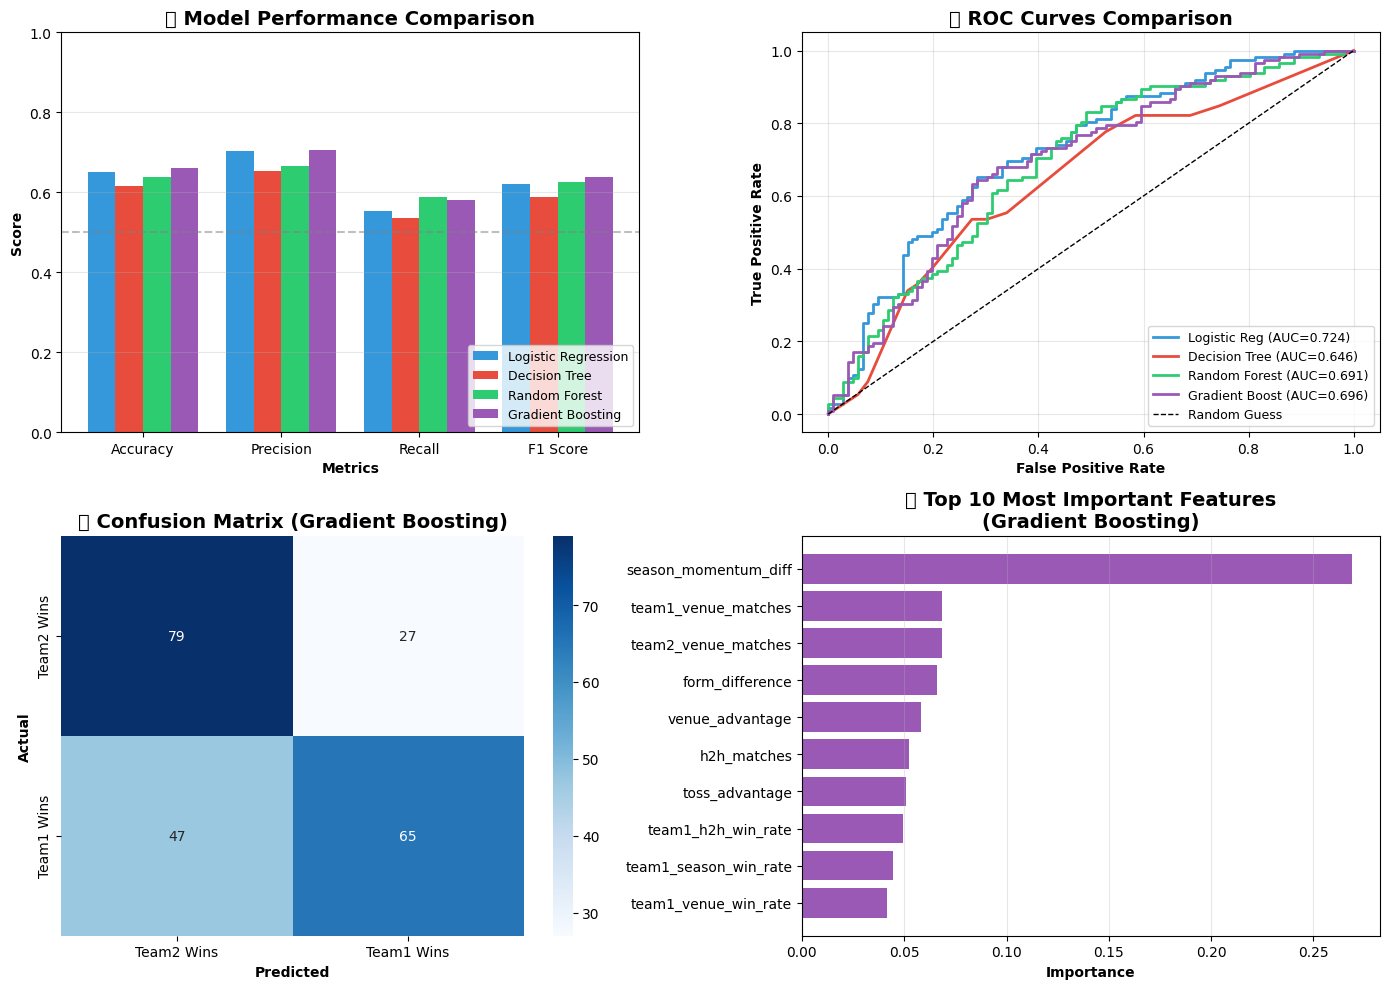

✓ Model comparison visualization saved!


In [31]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

colors = ['#3498db', '#e74c3c', '#2ecc71', '#9b59b6']

ax1 = axes[0, 0]
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
x = np.arange(len(metrics))
width = 0.2

for i, model in enumerate(results_df['Model']):
    values = [results_df.loc[i, m] for m in metrics]
    ax1.bar(x + i*width, values, width, label=model, color=colors[i])

ax1.set_xlabel('Metrics', fontweight='bold')
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_title('🏏 Model Performance Comparison', fontweight='bold', fontsize=14)
ax1.set_xticks(x + width*1.5)
ax1.set_xticklabels(metrics)
ax1.legend(loc='lower right', fontsize=9)
ax1.set_ylim(0, 1)
ax1.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5, label='Random Guess')
ax1.grid(axis='y', alpha=0.3)

ax2 = axes[0, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)

ax2.plot(fpr_lr, tpr_lr, color=colors[0], lw=2, label=f'Logistic Reg (AUC={roc_auc_score(y_test, y_prob_lr):.3f})')
ax2.plot(fpr_dt, tpr_dt, color=colors[1], lw=2, label=f'Decision Tree (AUC={roc_auc_score(y_test, y_prob_dt):.3f})')
ax2.plot(fpr_rf, tpr_rf, color=colors[2], lw=2, label=f'Random Forest (AUC={roc_auc_score(y_test, y_prob_rf):.3f})')
ax2.plot(fpr_gb, tpr_gb, color=colors[3], lw=2, label=f'Gradient Boost (AUC={roc_auc_score(y_test, y_prob_gb):.3f})')
ax2.plot([0, 1], [0, 1], 'k--', lw=1, label='Random Guess')

ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')
ax2.set_title('🎯 ROC Curves Comparison', fontweight='bold', fontsize=14)
ax2.legend(loc='lower right', fontsize=9)
ax2.grid(alpha=0.3)

ax3 = axes[1, 0]
cm_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', ax=ax3,
            xticklabels=['Team2 Wins', 'Team1 Wins'],
            yticklabels=['Team2 Wins', 'Team1 Wins'])
ax3.set_xlabel('Predicted', fontweight='bold')
ax3.set_ylabel('Actual', fontweight='bold')
ax3.set_title('🏆 Confusion Matrix (Gradient Boosting)', fontweight='bold', fontsize=14)

ax4 = axes[1, 1]
feature_importance = pd.DataFrame({
    'Feature': pre_match_features,
    'Importance': gb_model.feature_importances_
}).sort_values('Importance', ascending=True).tail(10)

ax4.barh(feature_importance['Feature'], feature_importance['Importance'], color='#9b59b6')
ax4.set_xlabel('Importance', fontweight='bold')
ax4.set_title('🔑 Top 10 Most Important Features\n(Gradient Boosting)', fontweight='bold', fontsize=14)
ax4.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/figures/model_comparison.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("✓ Model comparison visualization saved!")